FACEBOOK PROPHET TIME SERIES TECHNICAL ANALYSIS

Please run all cells in order, then play with the charts

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import datetime
#Data analysis packages learned from DGMD S-14 Prof.Jose Ramirez Herran, Harvard Summer School

In [2]:
#https://facebook.github.io/prophet/docs/quick_start.html#python-api
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
#Set up default API values
API_get_address = "https://api.glassnode.com/v1/metrics/market/price_usd_close"
Token = "BTC" #or ETH or LTC
#Year start UNIX timestamps, represent January 1st
Year_2021 = "1609459200"
Year_2020 = "1577854800"
Year_2019 = "1546300800"
Year_2018 = "1514764800"
Year_2017 = "1483228800"
Year_2016 = "1451606400"
#Choose your default start year
Data_start_year = Year_2016
#Choose your default frequency eg "1w" or "24h"
Data_frequency = "24h"
#Days to predict default
Days_to_predict = 365
#Choose to log price data by base e
Natural_log = False

In [4]:
def Pull_blockchain_data(token, data_start_year, data_frequency, natural_log = False):
    '''
    Portions of code from glassnode API documentation 
    https://docs.glassnode.com/basic-api/api-key#example-using-python
    requests,json,pandas already imported
    natural_log takes the loge of the price, boolean. Default is FALSE.
    '''
    API_KEY = '1rScABdwvd1vnOtqt4FWaI9pdeU'
    '''
    Make API request
    a is your ticker (BTC or ETH or LTC)
    s is timestamp start
    i is frequency, code default is daily, 1w is weekly
    '''
    res = requests.get(API_get_address,
        params={'a': token, 'api_key': API_KEY, 's':data_start_year, 'i': data_frequency})
    # convert to pandas dataframe
    df = pd.read_json(res.text, convert_dates=['t'])
    
    logarithmic = ""
    #Loge data transformation
    if natural_log:
        df['v'] = np.log(df['v'])
        logarithmic = "Log_e "
    
    #creates title with currency and data start year
    global Title
    Title = logarithmic + token + " since " + datetime.datetime.utcfromtimestamp(int(data_start_year)).strftime('%Y')
        
    #timestamp change https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date
    return df


In [5]:
def Prophet_predict(num_to_predict, dataframe, title):
    #rename columns and create model
    df_named = dataframe.rename(columns={'t': 'ds', 'v': 'y'})
    m = Prophet()
    m.fit(df_named)

    #make future dataframe, select periods
    future = m.make_future_dataframe(periods=num_to_predict)

    #fill future dataframe with predicted values
    forecast = m.predict(future)
    #forecast[['ds','yhat','yhat_lower','yhat_upper']].tail() #print sample
    
    #appends prediction days to title
    Title = title + "; Predicts the next " + str(num_to_predict) + " days"
    
    #prints graphic forecast
    fig_price_forecast = m.plot(forecast)
    ax = fig_price_forecast.gca()
    ax.set_title(Title, size=20)
    ax.set_xlabel("Time", size=20)
    ax.set_ylabel("Price", size=20)
 
    #credit for labels code https://stackoverflow.com/questions/57982573/change-the-features-of-prophet-plot
    #Facebook docs credited at import

Prophet algorithm predictions shown below, with various inputs.
Daily and yearly seasonality automatically disabled by prophet based on data.
The main blue line represents the fitted model
the shaded area represents the expected value in future

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


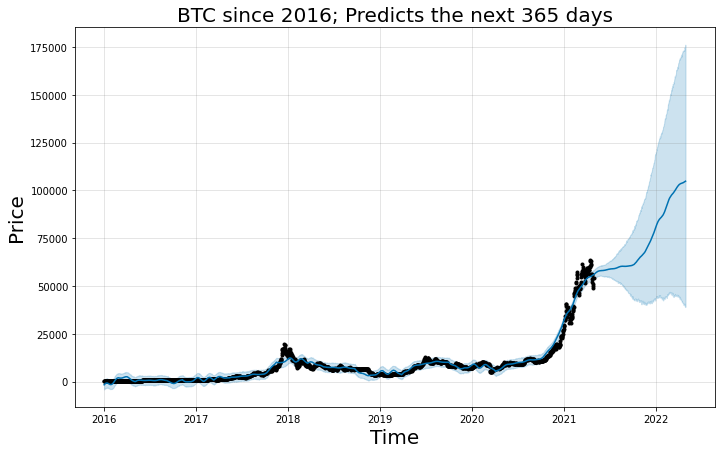

In [6]:
#Runs with default values
Prophet_predict(Days_to_predict, Pull_blockchain_data(Token, Data_start_year, Data_frequency, Natural_log), Title)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


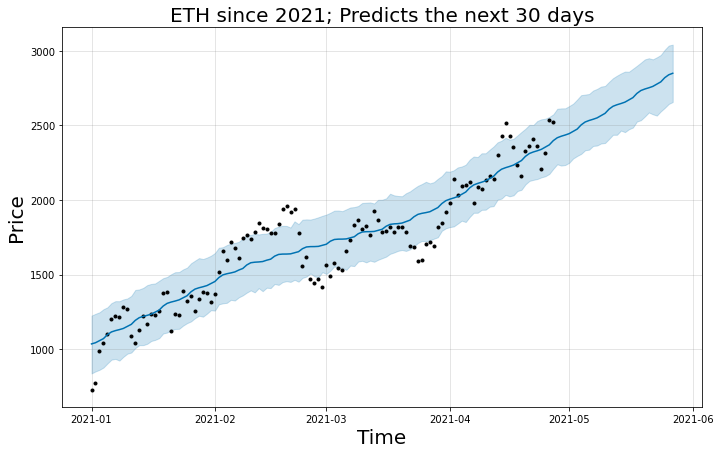

In [7]:
#Ethereum
Prophet_predict(30, Pull_blockchain_data("ETH", Year_2021, "24h"), Title)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


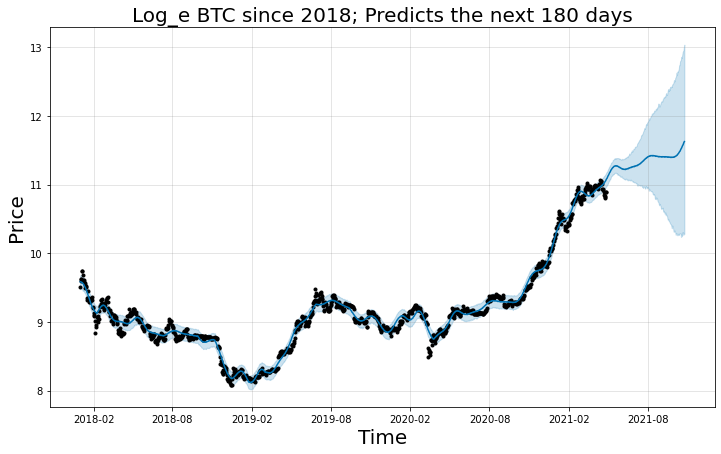

In [8]:
#Logarithmic BTC
Prophet_predict(180, Pull_blockchain_data("BTC", Year_2018, Data_frequency, True), Title)